# Load the required libraries & import the dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r'C:\Users\priya\Downloads\FDA RECALL\archive (1)\fda_product_recalls.csv') #importing the dataset


# Inspection of Dataset

In [3]:
# Lets see the first 5 rows of the dataset
print(df.head(5))

     fei_number               recalling_firm_name    product_type  \
0  3.002602e+09                 Lamb Weston Sales  Food/Cosmetics   
1  3.012438e+09          Fresh Express Incorpated  Food/Cosmetics   
2  3.012438e+09          Fresh Express Incorpated  Food/Cosmetics   
3  3.012438e+09          Fresh Express Incorpated  Food/Cosmetics   
4  1.000222e+09  Blood Bank Computer Systems, Inc       Biologics   

  product_classification      status  \
0                Class I     Ongoing   
1                Class I     Ongoing   
2                Class I     Ongoing   
3                Class I     Ongoing   
4               Class II  Terminated   

                                distribution_pattern recalling_firm_city  \
0  Distributed in CA, IA, IL, KS, LA MO, MS, NM, ...           Kennewick   
1  Product was shipped to the following states: F...          Windermere   
2  Product was shipped to the following states: F...          Windermere   
3  Product was shipped to the following 

In [4]:
# Lets see the last 5 rows of the dataset
print(df.tail(5))

         fei_number                 recalling_firm_name    product_type  \
83150  3.004404e+09                    Panera Bread LLC  Food/Cosmetics   
83151  3.004162e+09      DSM Nutritional Products, Inc.  Food/Cosmetics   
83152  3.002727e+09                     Best West Foods  Food/Cosmetics   
83153  3.002727e+09                     Best West Foods  Food/Cosmetics   
83154  3.005339e+09  Diversified Natural Products, Inc.  Food/Cosmetics   

      product_classification      status  \
83150               Class II  Terminated   
83151               Class II  Terminated   
83152               Class II  Terminated   
83153               Class II  Terminated   
83154               Class II  Terminated   

                                    distribution_pattern recalling_firm_city  \
83150                                         Nationwide         Saint Louis   
83151                                         NJ, WI, IL          Parsippany   
83152                                       

In [5]:
# Shape of the dataset
print(df.shape)

(83155, 17)


In [6]:
# Columns of the dataset
print(df.columns)

Index(['fei_number', 'recalling_firm_name', 'product_type',
       'product_classification', 'status', 'distribution_pattern',
       'recalling_firm_city', 'recalling_firm_state', 'recalling_firm_country',
       'center_classification_date', 'reason_for_recall',
       'product_description', 'event_id', 'event_classification', 'product_id',
       'center', 'recall_details'],
      dtype='object')


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83155 entries, 0 to 83154
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   fei_number                  83125 non-null  float64
 1   recalling_firm_name         83155 non-null  object 
 2   product_type                83155 non-null  object 
 3   product_classification      83155 non-null  object 
 4   status                      83155 non-null  object 
 5   distribution_pattern        83154 non-null  object 
 6   recalling_firm_city         83155 non-null  object 
 7   recalling_firm_state        83155 non-null  object 
 8   recalling_firm_country      83155 non-null  object 
 9   center_classification_date  83155 non-null  object 
 10  reason_for_recall           83155 non-null  object 
 11  product_description         83155 non-null  object 
 12  event_id                    83155 non-null  int64  
 13  event_classification        831

In [8]:
# Summary statistics of the dataset
print(df.describe())

         fei_number      event_id     product_id
count  8.312500e+04  83155.000000   83155.000000
mean   1.574831e+09  76043.135698  152335.826276
std    1.445085e+09   9765.920800   28751.616368
min    2.708000e+03  32594.000000   40403.000000
25%    2.015691e+06  69152.000000  130064.500000
50%    2.000006e+09  76459.000000  153416.000000
75%    3.006363e+09  83669.000000  176241.500000
max    3.026448e+09  92135.000000  199760.000000


# Data cleaning & processing

In [9]:
# missing values
print(df.isnull().sum())

fei_number                    30
recalling_firm_name            0
product_type                   0
product_classification         0
status                         0
distribution_pattern           1
recalling_firm_city            0
recalling_firm_state           0
recalling_firm_country         0
center_classification_date     0
reason_for_recall              0
product_description            0
event_id                       0
event_classification           0
product_id                     0
center                         0
recall_details                 0
dtype: int64


<Axes: >

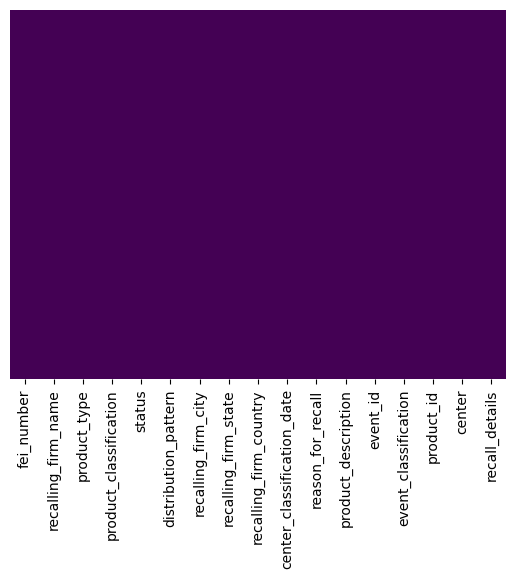

In [10]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')  # Visualizing missing values

In [11]:
# from heatmap we can see that there are no significant missing values in the dataset. But still we will remove the missing values in the dataset
# remove the missing values
df = df.dropna()


In [12]:
# Let's check duplicate values
print(df.duplicated().sum())

0


## Data type adjustments

In [13]:
# Convert the date column to datetime
df['center_classification_date'] = pd.to_datetime(df['center_classification_date'])

In [14]:
# Converting 'fei_number', 'event_id', and 'product_id' to strings
df['fei_number'] = df['fei_number'].astype(str)
df['event_id'] = df['event_id'].astype(str)
df['product_id'] = df['product_id'].astype(str)

In [15]:
# Let's convert 'product_type', 'product_classification', 'status', 'recalling_firm_country', 'event_classification', and 'center' into 'category'
df['product_type'] = df['product_type'].astype('category')
df['product_classification'] = df['product_classification'].astype('category')
df['status'] = df['status'].astype('category')
df['recalling_firm_country'] = df['recalling_firm_country'].astype('category')
df['event_classification'] = df['event_classification'].astype('category')
df['center'] = df['center'].astype('category')

In [16]:
# Confirm the changes 
print(df.dtypes)

fei_number                            object
recalling_firm_name                   object
product_type                        category
product_classification              category
status                              category
distribution_pattern                  object
recalling_firm_city                   object
recalling_firm_state                  object
recalling_firm_country              category
center_classification_date    datetime64[ns]
reason_for_recall                     object
product_description                   object
event_id                              object
event_classification                category
product_id                            object
center                              category
recall_details                        object
dtype: object


In [17]:
# Now we will check the unique values in the dataset
print(df.nunique())

fei_number                     8435
recalling_firm_name            8839
product_type                      6
product_classification            3
status                            3
distribution_pattern          17924
recalling_firm_city            3022
recalling_firm_state             54
recalling_firm_country           49
center_classification_date     2986
reason_for_recall             26851
product_description           72088
event_id                      30252
event_classification              3
product_id                    83124
center                            6
recall_details                83124
dtype: int64


# Visualization 

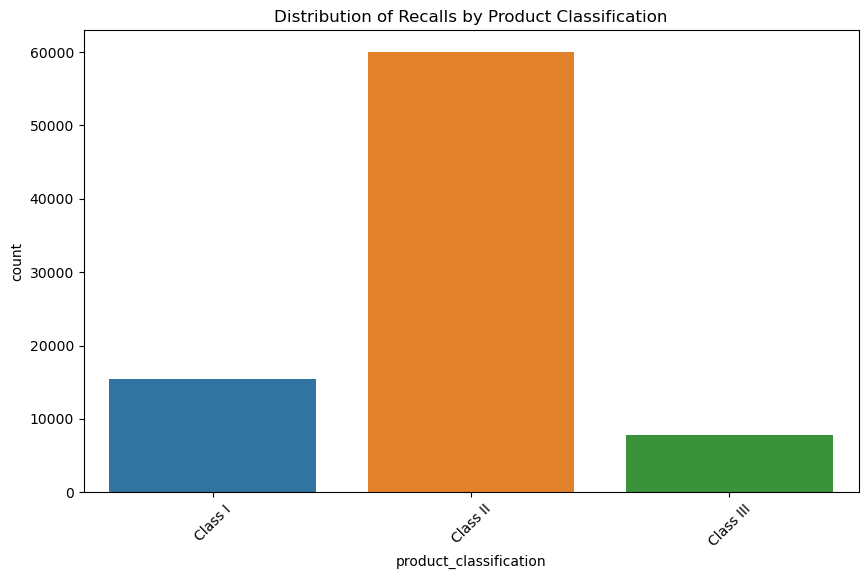

product_classification
Class II     59962
Class I      15421
Class III     7741
Name: count, dtype: int64


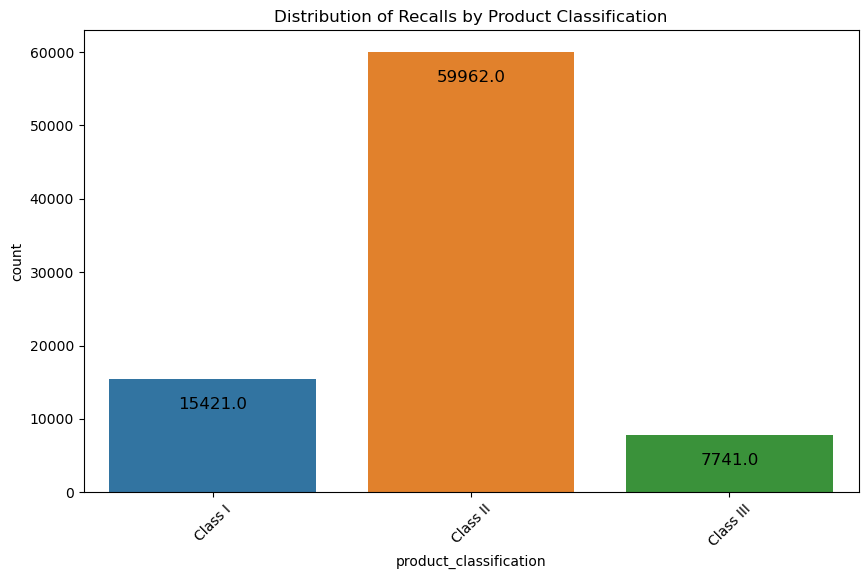

In [18]:
# Distribution of recalls by product classification 
plt.figure(figsize=(10,6))
sns.countplot(x='product_classification', data=df)
plt.title('Distribution of Recalls by Product Classification')
plt.xticks(rotation=45)
plt.show()

# Display the count of each product classification
print(df['product_classification'].value_counts())

# Add data labels to the countplot
plt.figure(figsize=(10,6))
ax = sns.countplot(x='product_classification', data=df)
plt.title('Distribution of Recalls by Product Classification')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()


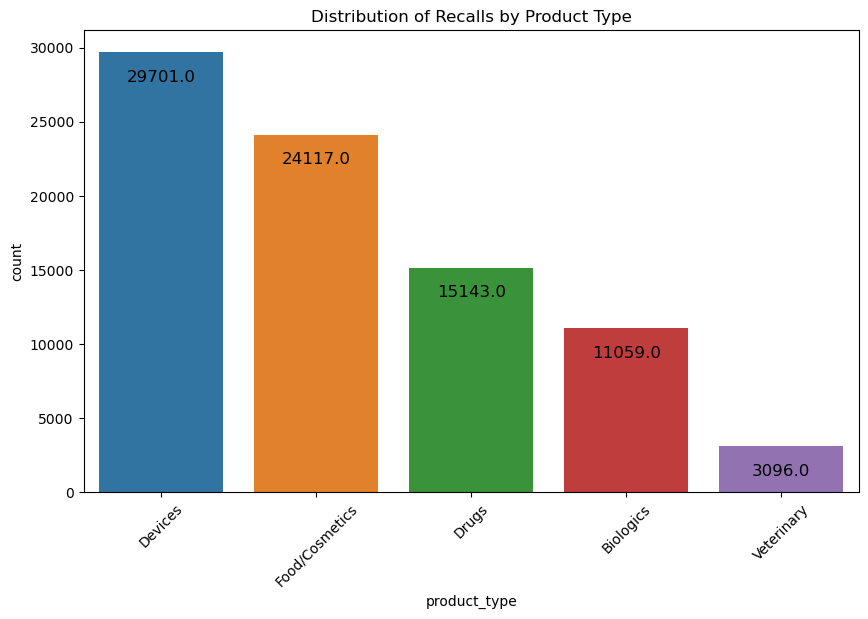

product_type
Devices           29701
Food/Cosmetics    24117
Drugs             15143
Biologics         11059
Veterinary         3096
Tobacco               8
Name: count, dtype: int64


In [19]:
# Distribution of recalls by product type with data labels (top 5)
plt.figure(figsize=(10,6))
ax = sns.countplot(x='product_type', data=df, order=df['product_type'].value_counts().index[:5])
plt.title('Distribution of Recalls by Product Type')
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='top', color='black', size=12)
plt.show()

# display the count of each product type
print(df['product_type'].value_counts())

product_description
Source Plasma                                     1354
Red Blood Cells Leukocytes Reduced                1274
Red Blood Cells, Leukocytes Reduced               1163
Blood and Blood Products for Reprocessing         1057
Apheresis Platelets, Leukocytes Reduced            639
Platelets Pheresis Leukocytes Reduced              465
Red Blood Cells                                    464
Apheresis Red Blood Cells, Leukocytes Reduced      410
Fresh Frozen Plasma                                361
Red Blood Cells (Apheresis) Leukocytes Reduced     247
Name: count, dtype: int64


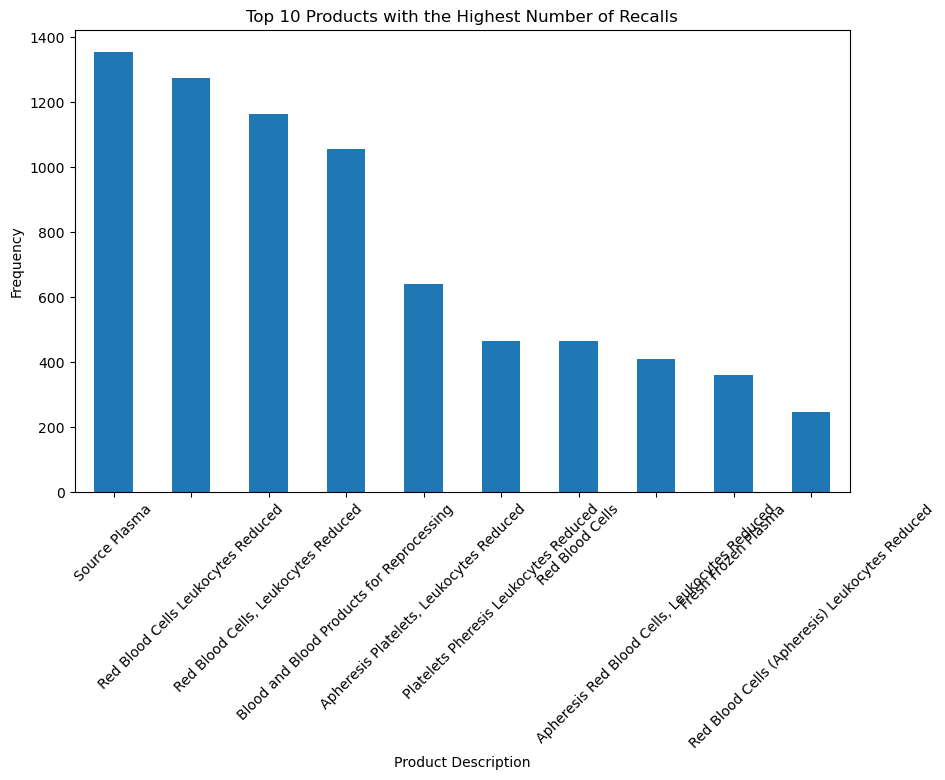

In [20]:
# Top 10 products with the highest number of recalls
top_10_products = df['product_description'].value_counts().head(10)
print(top_10_products)
plt.figure(figsize=(10,6))
top_10_products.plot(kind='bar')
plt.title('Top 10 Products with the Highest Number of Recalls')
plt.xlabel('Product Description')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Top 10 recalles in devices
top_10_devices = df[df['product_type'] == 'Devices']['product_description'].value_counts().head(10)
print(top_10_devices)


product_description
Torcon NB Advantage Catheters - Product Usage: Intended for use in the peripheral and coronary vascular system, including the carotid arteries, in giographic procedures by physicians trained and experienced in angiographic techniques.                                                                                                                                                                                                                                                                                                                                                                                                                                                                          71
C7000 - CUSA¿ Clarity Ultrasonic Tissue Ablation System                                                                                                                                                                                                                                      

In [22]:
# Top 10 recalles in drugs
top_10_drugs = df[df['product_type'] == 'Drugs']['product_description'].value_counts().head(10)
print(top_10_drugs)


product_description
Medline Suture Removal Tray, Sterile, Single Use Only. Packaged in Mexico for Medline Industries, Inc., Mundelein, IL 60060                                                                                                                                                                          3
Diazepam Injection, USP 5 mg/mL, 10 mL, Multiple-dose fliptop vial, RX only, HOSPIRA, INC. LAKE FOREST, IL 60045 USA, NDC 0409-3213-12                                                                                                                                                               3
Medline Suture Removal Tray, Sterile, Single Use Only. Packaged in USA for Medline Industries, Inc., Mundelein, IL 60060                                                                                                                                                                             3
Medline Suture Removal Tray, Sterile, Single Use Only. Packaged in Mexico by Medline Industries

In [23]:
# Top 10 recalles in food/cosmetics
top_10_food_cosmetics = df[df['product_type'] == 'Food/Cosmetics']['product_description'].value_counts().head(10)
print(top_10_food_cosmetics)



product_description
Pastillage (gum paste) Flowers                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              8
Apricot Dice Large-SO2 70APRIC01                                                                                      

In [24]:
# top 10 recalls in biologics
top_10_biologics = df[df['product_type'] == 'Biologics']['product_description'].value_counts().head(10)
print(top_10_biologics)


product_description
Source Plasma                                     1354
Red Blood Cells Leukocytes Reduced                1274
Red Blood Cells, Leukocytes Reduced               1163
Blood and Blood Products for Reprocessing         1057
Apheresis Platelets, Leukocytes Reduced            639
Platelets Pheresis Leukocytes Reduced              465
Red Blood Cells                                    464
Apheresis Red Blood Cells, Leukocytes Reduced      410
Fresh Frozen Plasma                                361
Red Blood Cells (Apheresis) Leukocytes Reduced     247
Name: count, dtype: int64


recalling_firm_country
United States     79707
Canada              843
Germany             306
United Kingdom      245
Switzerland         243
Name: count, dtype: int64


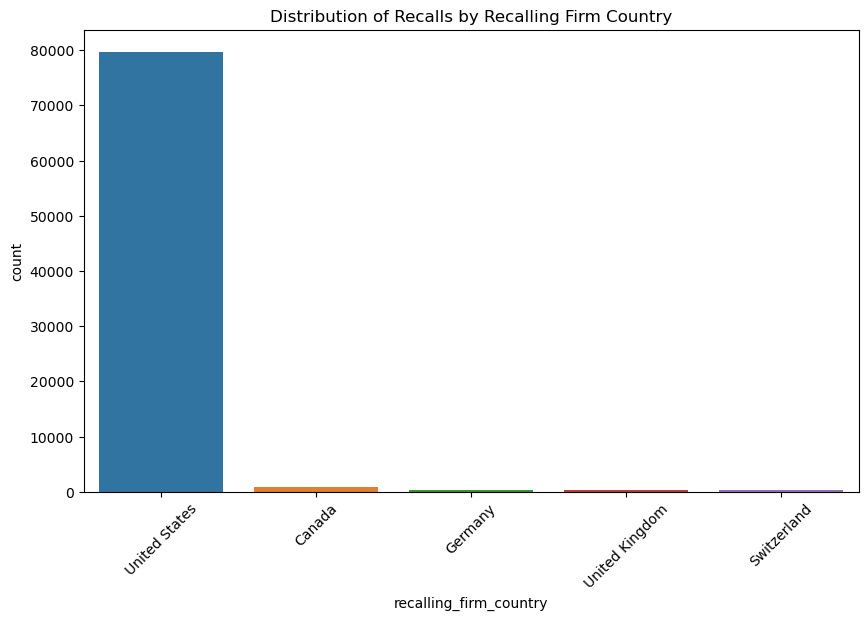

In [25]:
# Distribution of recalls by recalling firm country (top 5)
plt.figure(figsize=(10,6))
ax = sns.countplot(x='recalling_firm_country', data=df, order=df['recalling_firm_country'].value_counts().index[:5])
plt.title('Distribution of Recalls by Recalling Firm Country')
plt.xticks(rotation=45)
plt

# display the count of top 5 recalling firm country
print(df['recalling_firm_country'].value_counts().head(5))

recalling_firm_name
Zimmer Biomet, Inc.                   875
OneBlood, Inc.                        713
Customed, Inc                         682
Garden-Fresh Foods, Inc.              634
Siemens Medical Solutions USA, Inc    547
ICU Medical, Inc.                     539
Aidapak Services, LLC                 538
American National Red Cross (The)     519
King Bio Inc.                         493
GE Healthcare, LLC                    474
Name: count, dtype: int64


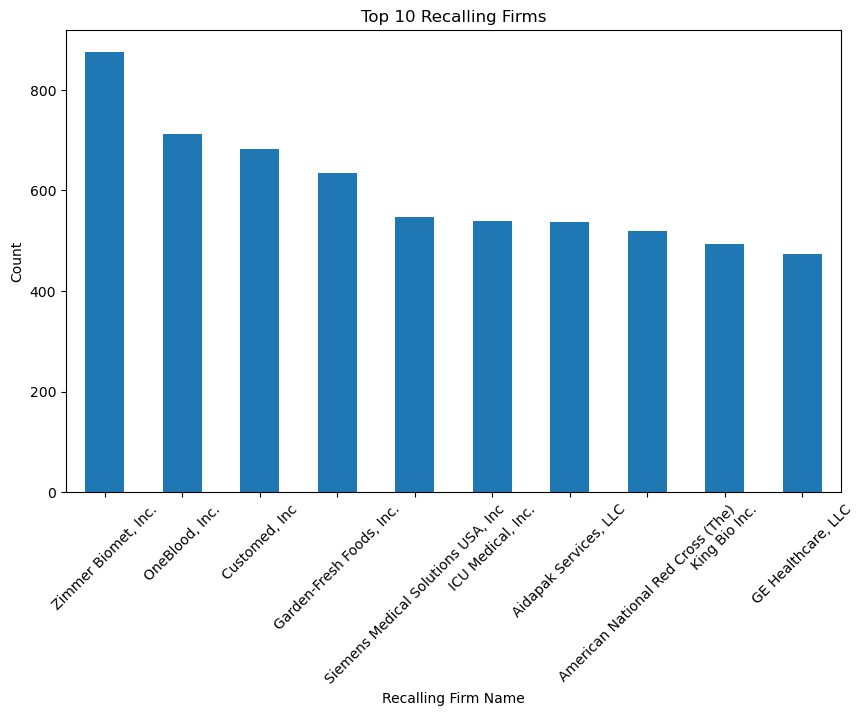

In [26]:
# top 10 recalling firms
top_10_firms = df['recalling_firm_name'].value_counts().head(10)
print(top_10_firms)

# We will plot the top 10 recalling firms
plt.figure(figsize=(10,6))
top_10_firms.plot(kind='bar')
plt.title('Top 10 Recalling Firms')
plt.xlabel('Recalling Firm Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Top state 5 with the highest recalls (Firm regrestrasion state)
top_state = df['recalling_firm_state'].value_counts().head(5)
print(top_state)

recalling_firm_state
California    9078
Florida       5723
Illinois      4779
New Jersey    4318
New York      4021
Name: count, dtype: int64


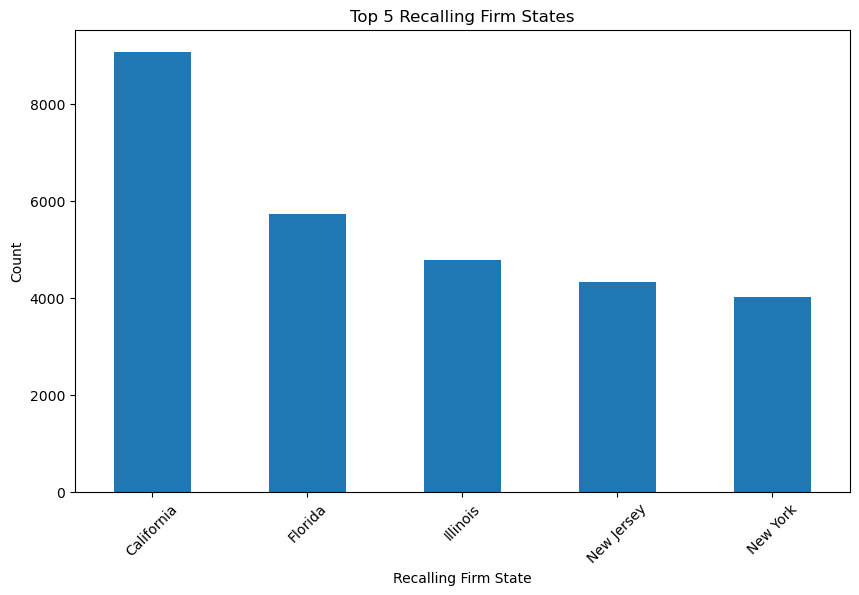

In [28]:
# We will plot the top 5 recalling firm states
plt.figure(figsize=(10,6))
top_state.plot(kind='bar')
plt.title('Top 5 Recalling Firm States')
plt.xlabel('Recalling Firm State')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


C:\Users\priya\AppData\Local\Temp\ipykernel_23020\3858157119.py:23: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):


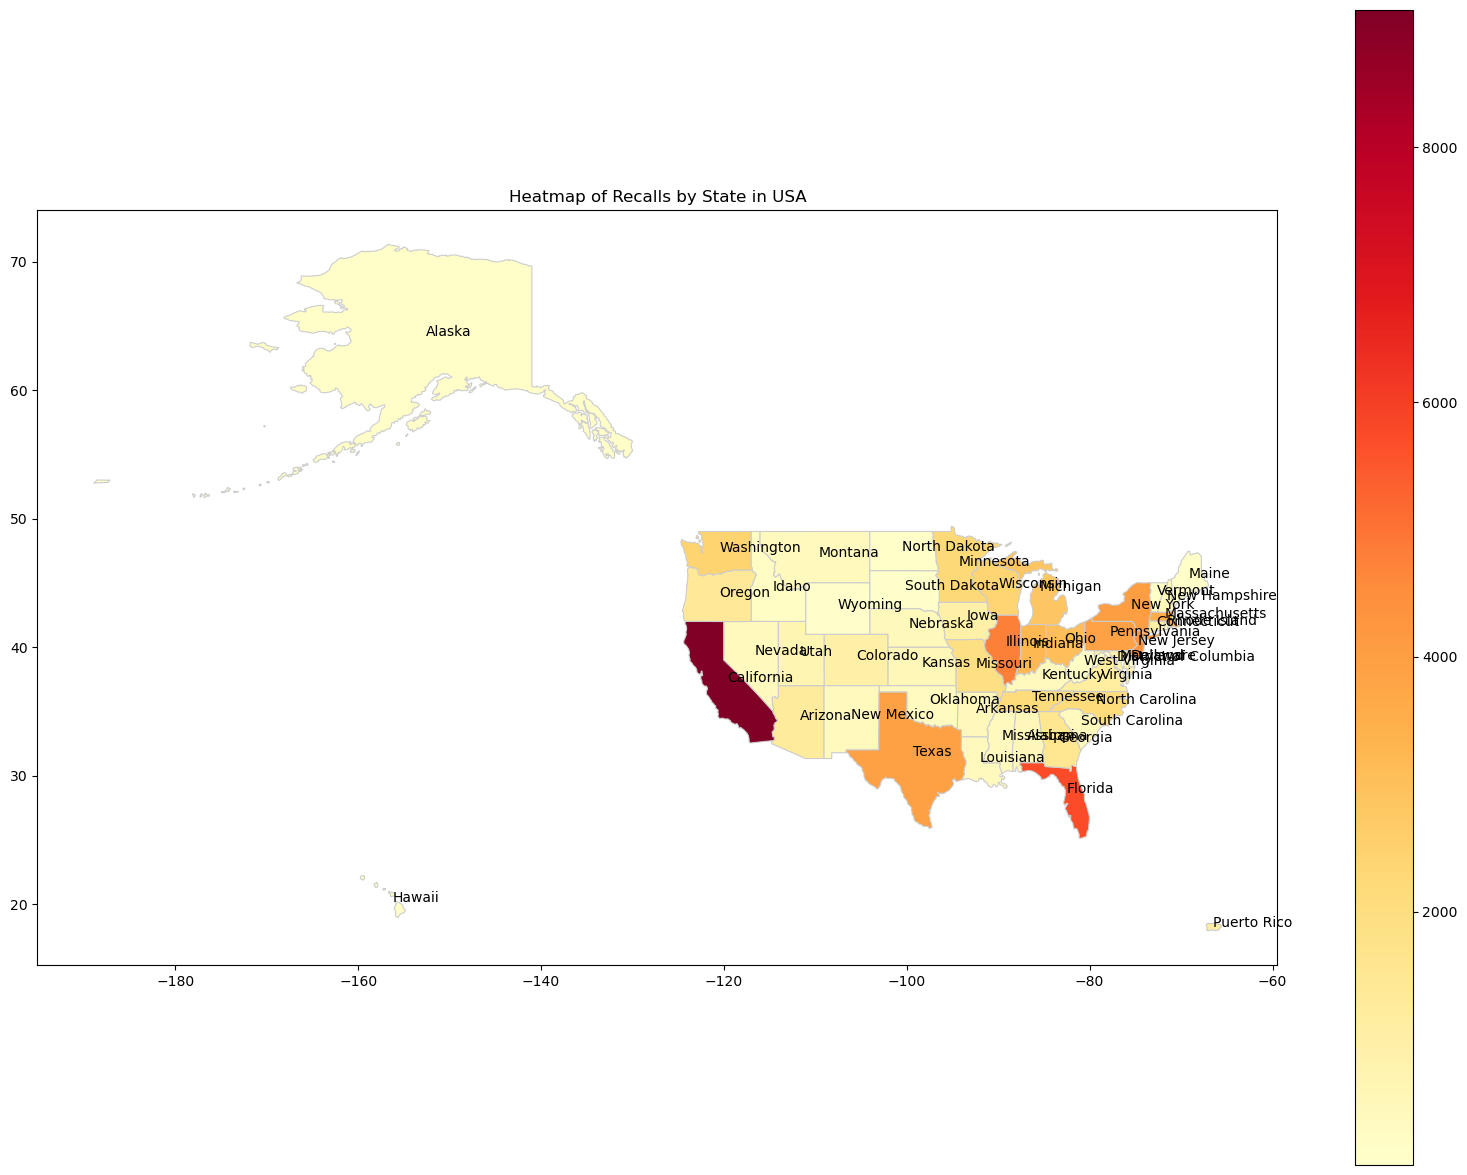

In [29]:
# Heatmap of US states with the highest recalls
import geopandas as gpd

# Load US States Geometry
us_states = gpd.read_file('https://raw.githubusercontent.com/PublicaMundi/MappingAPI/master/data/geojson/us-states.json')

# Assuming you have a DataFrame 'df' with 'recalling_firm_state' column
# Count the number of recalls for each state
state_recalls = df['recalling_firm_state'].value_counts().reset_index()
state_recalls.columns = ['recalling_firm_state', 'RecallCount']

# Merge GeoDataFrame with recall data
merged = us_states.set_index('name').join(state_recalls.set_index('recalling_firm_state'))

# Fill NaN values with 0
merged['RecallCount'] = merged['RecallCount'].fillna(0)

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(20, 15))  # Adjust figure size here
merged.plot(column='RecallCount', cmap='YlOrRd', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add state names
for x, y, label in zip(merged.geometry.centroid.x, merged.geometry.centroid.y, merged.index):
    ax.text(x, y, label, fontsize=10)

plt.title('Heatmap of Recalls by State in USA')
plt.show()

year
2012    5537
2013    8562
2014    7871
2015    8508
2016    8938
2017    7933
2018    8321
2019    8274
2020    6224
2021    5278
2022    5768
2023    1910
Name: count, dtype: int64


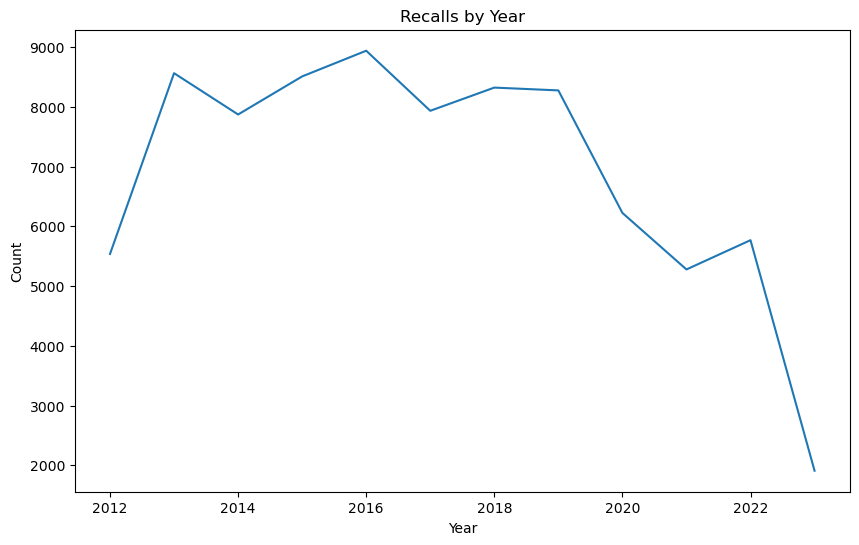

In [30]:
# Visualise Time series of recalls by year
df['year'] = df['center_classification_date'].dt.year
recalls_by_year = df['year'].value_counts().sort_index()
print(recalls_by_year)

plt.figure(figsize=(10,6))
recalls_by_year.plot(kind='line')
plt.title('Recalls by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


month
1     6481
2     6644
3     6860
4     6445
5     6420
6     6855
7     7508
8     8051
9     6683
10    6992
11    6852
12    7333
Name: count, dtype: int64


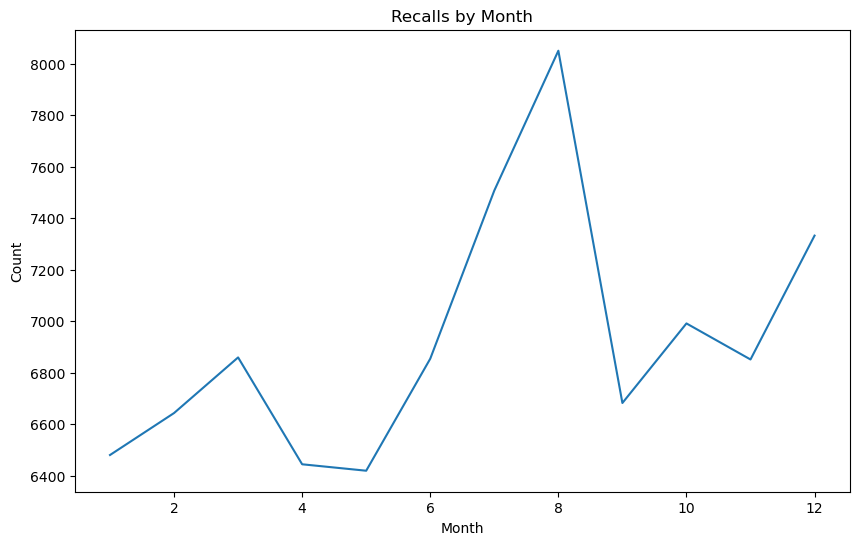

In [31]:
# Visualise Time series of recalls by month
df['month'] = df['center_classification_date'].dt.month
recalls_by_month = df['month'].value_counts().sort_index()
print(recalls_by_month)

plt.figure(figsize=(10,6))
recalls_by_month.plot(kind='line')
plt.title('Recalls by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.show()

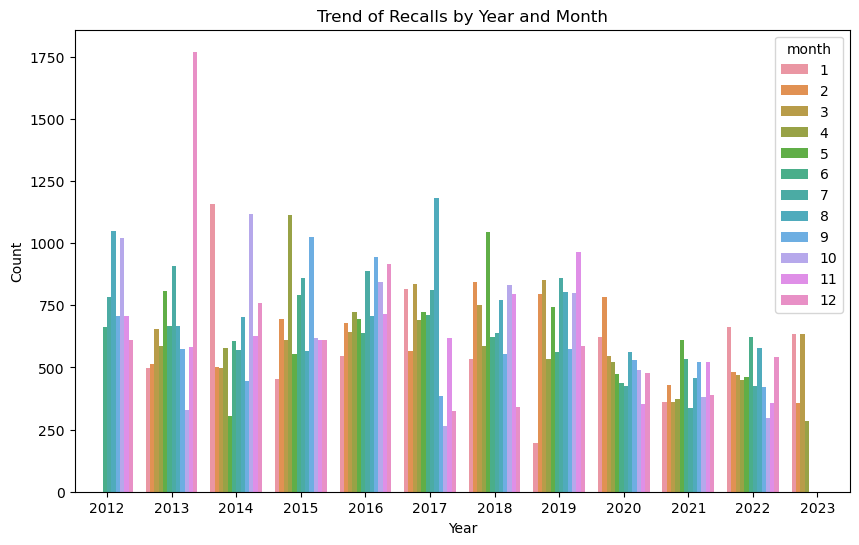

In [32]:
# Trend of recalls by year and month
plt.figure(figsize=(10,6))
sns.countplot(x='year', hue='month', data=df)
plt.title('Trend of Recalls by Year and Month')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()


status
Terminated    70298
Ongoing       11795
Completed      1031
Name: count, dtype: int64


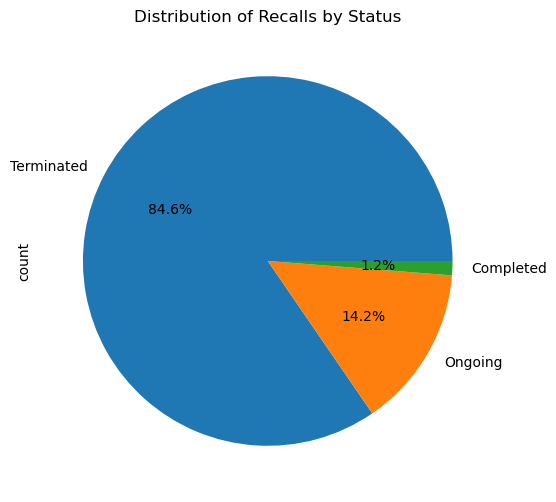

In [33]:
# Now we will check the distribution of recalls by status by pie chart
print(df['status'].value_counts())
plt.figure(figsize=(10,6))
df['status'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Recalls by Status')
plt.show()

center
CDRH     29701
CFSAN    24117
CDER     15143
CBER     11059
CVM       3096
CTP          8
Name: count, dtype: int64


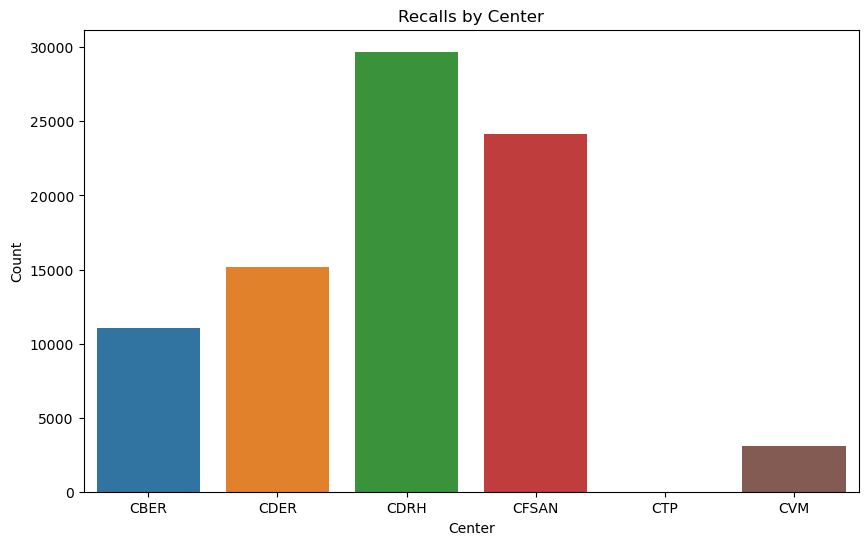

In [34]:
# Recalls by center
print(df['center'].value_counts())
plt.figure(figsize=(10,6))
sns.countplot(x='center', data=df)
plt.title('Recalls by Center')
plt.xlabel('Center')
plt.ylabel('Count')
plt.show()

status                  Completed  Ongoing  Terminated
product_classification                                
Class I                       131     1684       13606
Class II                      844     9715       49403
Class III                      56      396        7289


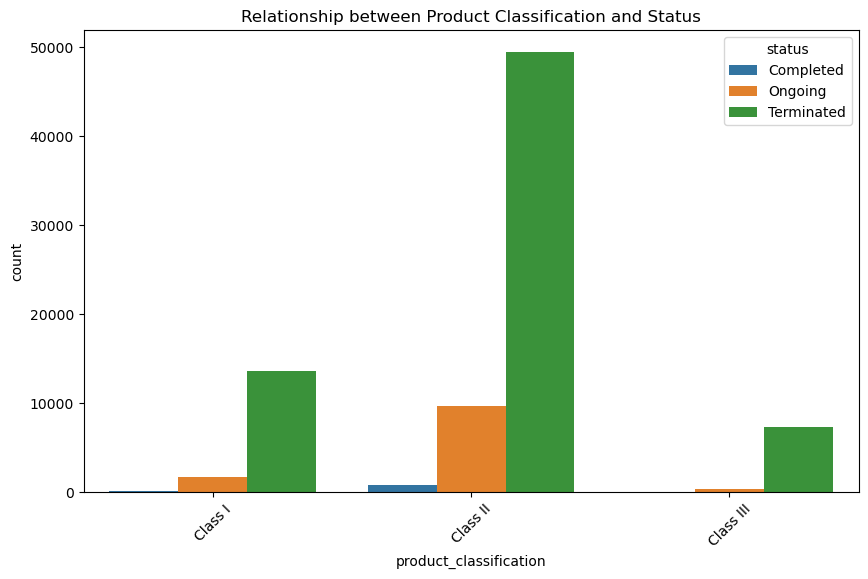

In [35]:
# Now we will explore some relationships between the variables
# Print Relationship between product classification and status
print(pd.crosstab(df['product_classification'], df['status']))
plt.figure(figsize=(10,6))
sns.countplot(x='product_classification', hue='status', data=df)
plt.title('Relationship between Product Classification and Status')
plt.xticks(rotation=45)
plt.show()

status          Completed  Ongoing  Terminated
product_type                                  
Biologics              17       21       11021
Devices               439     6732       22530
Drugs                 229     3505       11409
Food/Cosmetics        335     1280       22502
Tobacco                 0        0           8
Veterinary             11      257        2828


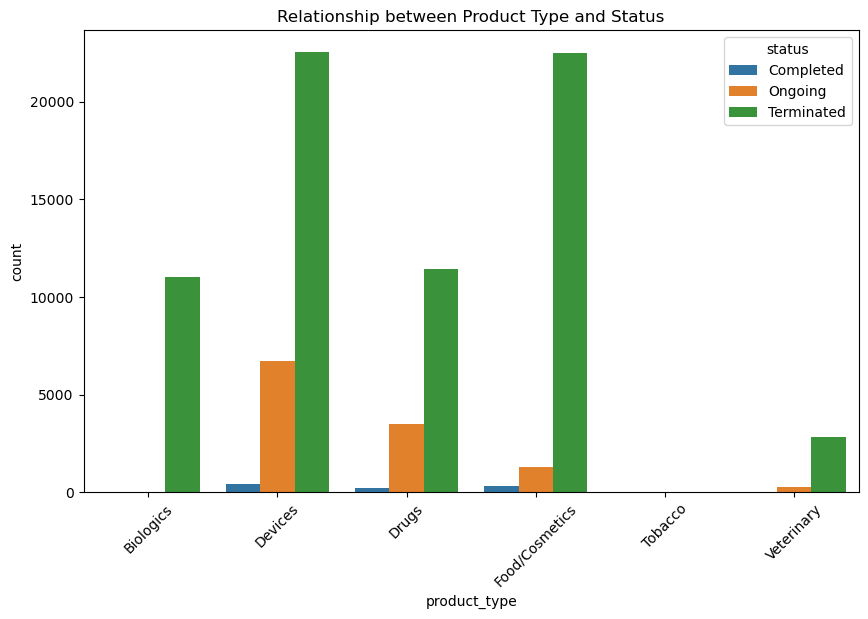

In [36]:
# Relationship between product type and status
print(pd.crosstab(df['product_type'], df['status']))
plt.figure(figsize=(10,6))
sns.countplot(x='product_type', hue='status', data=df)
plt.title('Relationship between Product Type and Status')
plt.xticks(rotation=45)
plt.show()

In [37]:
# Relationship between recalling firm country and status
print(pd.crosstab(df['recalling_firm_country'], df['status']))

status                      Completed  Ongoing  Terminated
recalling_firm_country                                    
-                                   0        0           6
Argentina                           0        1           0
Armenia                             0        0           4
Australia                           0        3          11
Austria                             0        2          14
Belgium                             0        7          44
Brazil                              0        1           1
Bulgaria                            0        1           0
Canada                              4       77         762
Chile                               0        2           6
China                               0      110          49
Costa Rica                          0        0           3
Czech Republic                      0        3           0
Denmark                             1       17          33
Dominican Republic (the)            0        2          

In [38]:
# Let's see about India
print(df[df['recalling_firm_country'] == 'India'])

         fei_number                       recalling_firm_name    product_type  \
306    3012323885.0  Global Pharma Healthcare Private Limited           Drugs   
2618   3007027193.0          Par Formulations Private Limited           Drugs   
7585   3008252295.0          Rubicon Research Private Limited           Drugs   
9494   3013406408.0                       Avanti Frozen Foods  Food/Cosmetics   
11600  3004282902.0       Avanti Frozen Foods Private Limited  Food/Cosmetics   
...             ...                                       ...             ...   
47052  3004819820.0                             Lupin Limited           Drugs   
50294  3005029956.0           Torrent Pharmaceuticals Limited           Drugs   
57961  3008581988.0                             Cipla Limited           Drugs   
66687  3003813519.0            Agila Specialties Private Ltd.           Drugs   
78803  3007373532.0                      Aurobindo Pharma LTD           Drugs   

      product_classificatio

In [39]:
# Explore about India recalls
india_recalls = df[df['recalling_firm_country'] == 'India']
print(india_recalls['product_type'].value_counts())

product_type
Drugs             64
Devices           11
Food/Cosmetics     3
Biologics          0
Tobacco            0
Veterinary         0
Name: count, dtype: int64


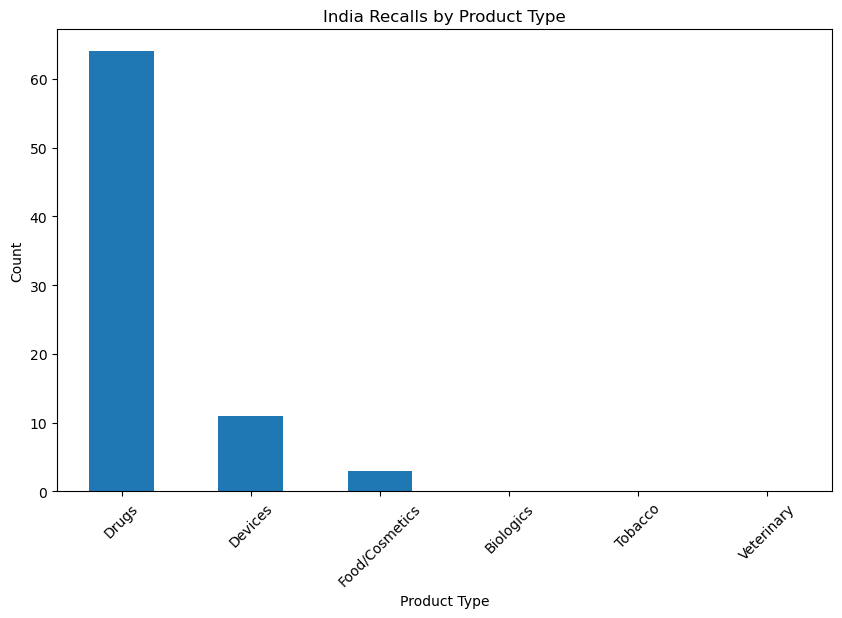

product_classification
Class II     60
Class III    13
Class I       5
Name: count, dtype: int64


In [40]:
# India recalls by product type
plt.figure(figsize=(10,6))
india_recalls['product_type'].value_counts().plot(kind='bar')
plt.title('India Recalls by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
print(india_recalls['product_classification'].value_counts())


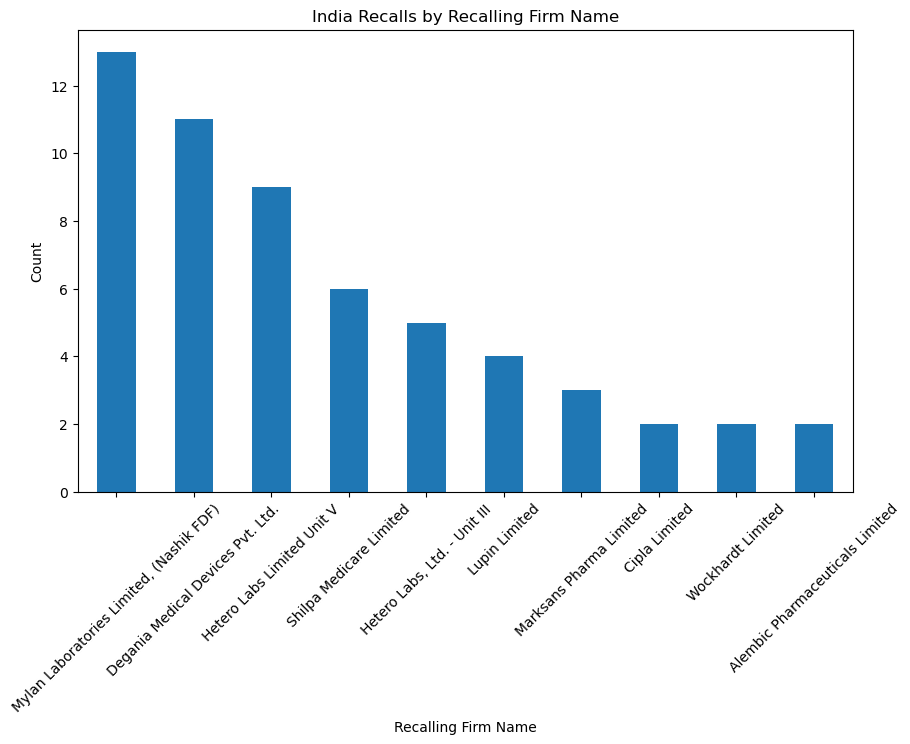

In [41]:
# Indian recalls by recalling firm name
plt.figure(figsize=(10,6))
india_recalls['recalling_firm_name'].value_counts().head(10).plot(kind='bar')
plt.title('India Recalls by Recalling Firm Name')
plt.xlabel('Recalling Firm Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


recalling_firm_name
Mylan Laboratories Limited, (Nashik FDF)    13
Hetero Labs Limited Unit V                   9
Shilpa Medicare Limited                      6
Hetero Labs, Ltd. - Unit III                 5
Lupin Limited                                4
Marksans Pharma Limited                      3
Alembic Pharmaceuticals Limited              2
Cipla Limited                                2
Wockhardt Limited                            2
Agila Specialties Private Ltd.               1
Name: count, dtype: int64


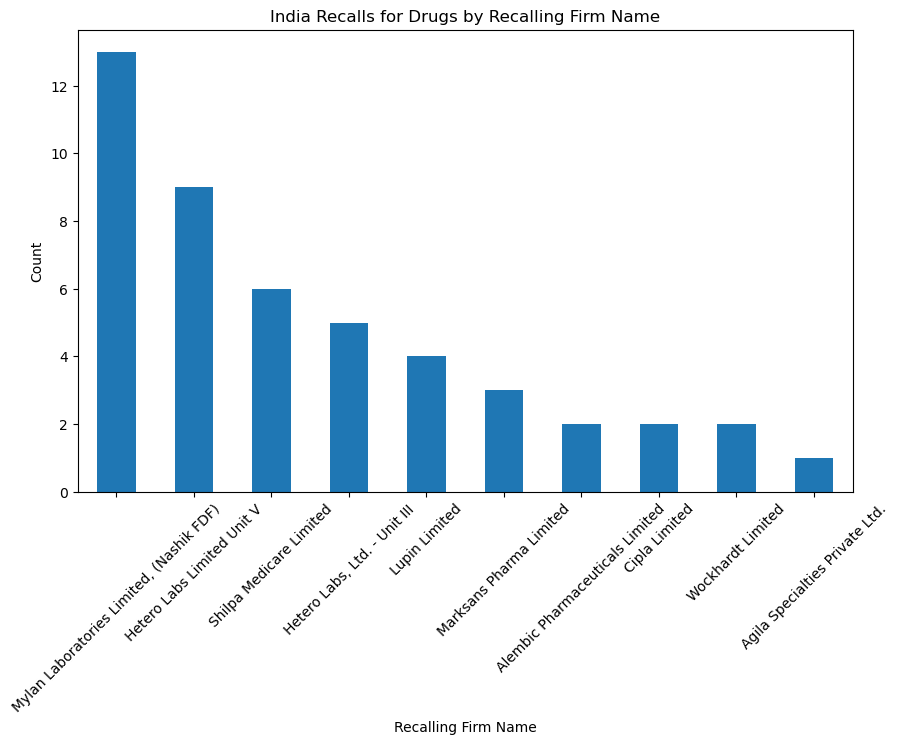

In [42]:
# Indian recall for drugs with firm name
india_drugs = india_recalls[india_recalls['product_type'] == 'Drugs']
print(india_drugs['recalling_firm_name'].value_counts().head(10))   
plt.figure(figsize=(10,6))
india_drugs['recalling_firm_name'].value_counts().head(10).plot(kind='bar')
plt.title('India Recalls for Drugs by Recalling Firm Name')
plt.xlabel('Recalling Firm Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


product_classification
Class II     47
Class III    12
Class I       5
Name: count, dtype: int64


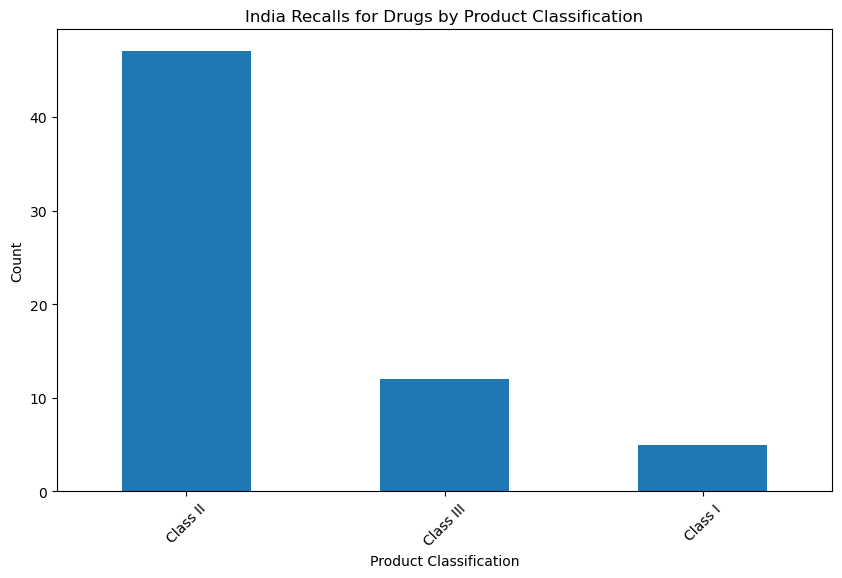

In [43]:
# Indian recall for drugs with product classification
print(india_drugs['product_classification'].value_counts())
plt.figure(figsize=(10,6))
india_drugs['product_classification'].value_counts().plot(kind='bar')
plt.title('India Recalls for Drugs by Product Classification')
plt.xlabel('Product Classification')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [44]:
# We will perfoem some analysis on the entire dataset
# Statastical analysis of the dataset
print(df.describe())



          center_classification_date          year         month
count                          83124  83124.000000  83124.000000
mean   2017-06-05 17:58:51.398874368   2016.921238      6.613710
min              2012-06-08 00:00:00   2012.000000      1.000000
25%              2014-11-17 00:00:00   2014.000000      4.000000
50%              2017-03-29 00:00:00   2017.000000      7.000000
75%              2019-10-29 00:00:00   2019.000000     10.000000
max              2023-04-21 00:00:00   2023.000000     12.000000
std                              NaN      3.070246      3.430081


In [45]:
# Relationship between product classification and recalling firm state
print(pd.crosstab(df['product_classification'], df['recalling_firm_state']))


recalling_firm_state       -  Alabama  Alaska  Arizona  Arkansas  California  \
product_classification                                                         
Class I                  266       57      19      169        32        2018   
Class II                2945      402      60      980       437        6215   
Class III                206       57       9      118        33         845   

recalling_firm_state    Colorado  Connecticut  Delaware  District of Columbia  \
product_classification                                                          
Class I                      253           96        23                     1   
Class II                     617          807       173                     4   
Class III                     88           63        40                     6   

recalling_firm_state    ...  South Dakota  Tennessee  Texas  Utah  Vermont  \
product_classification  ...                                                  
Class I                 ...          

In [46]:
# Time series of recalls by year and status with type of product
recalls_by_year_status = df.groupby(['year', 'status', 'product_type']).size().unstack()
print(recalls_by_year_status)

product_type     Biologics  Devices  Drugs  Food/Cosmetics  Tobacco  \
year status                                                           
2012 Completed           0        0      0               0        0   
     Ongoing             3        2      1               0        0   
     Terminated       1588     1320    458            1912        0   
2013 Completed           3        1     29               0        0   
     Ongoing             0        1    117               2        0   
     Terminated       2215     2294   1219            2445        0   
2014 Completed           0        3      0               0        0   
     Ongoing             0        7     36               0        0   
     Terminated       1017     3002   1515            1956        0   
2015 Completed           0       53      1               1        0   
     Ongoing             0       12      6               1        0   
     Terminated        883     2423   2045            2901        4   
2016 C

recalling_firm_state    California  Florida  Illinois  New Jersey  New York
product_classification                                                     
Class I                       2018      673       732         496       785
Class II                      6215     4576      3611        3243      2781
Class III                      845      474       436         579       455


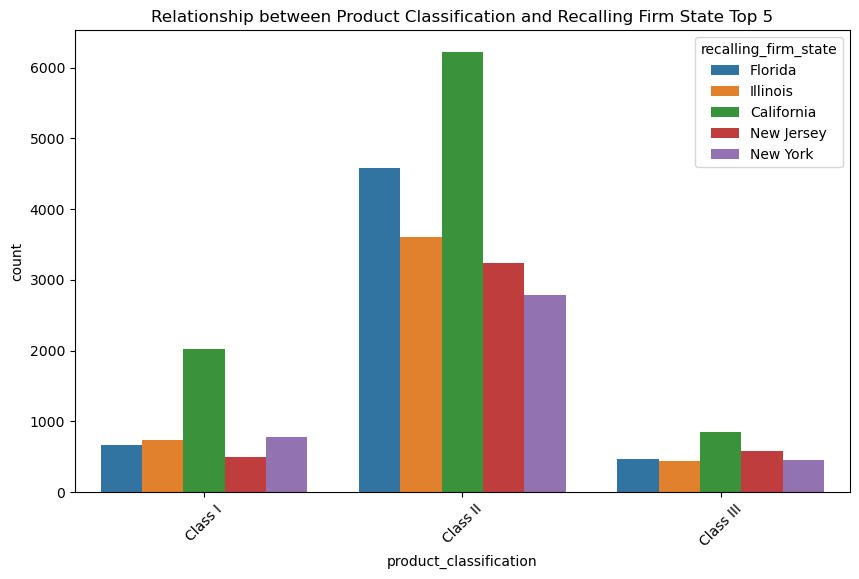

In [47]:
# Relationship between product classification and recalling firm state Top 5
top_5_states = df['recalling_firm_state'].value_counts().head(5).index
top_5_states_df = df[df['recalling_firm_state'].isin(top_5_states)]
print(pd.crosstab(top_5_states_df['product_classification'], top_5_states_df['recalling_firm_state']))
# Plot the relationship between product classification and recalling firm state Top 5
plt.figure(figsize=(10,6))
sns.countplot(x='product_classification', hue='recalling_firm_state', data=top_5_states_df)
plt.title('Relationship between Product Classification and Recalling Firm State Top 5')
plt.xticks(rotation=45)
plt.show()



# Text Analysis

In [48]:
# Let's perform some text analysis
# Importing the necessary libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud
from collections import Counter

In [49]:
# Download the necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\priya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [50]:
# Tokenize the reason for recall
reasons = df['reason_for_recall']
reasons = reasons.str.lower()
reasons = reasons.str.replace(r'[^\w\s]', '')
reasons = reasons.str.replace(r'\d+', '')
reasons = reasons.str.replace(r'\n', '')
reasons = reasons.str.replace(r'\r', '')
reasons = reasons.str.replace(r'\t', '')
reasons = reasons.str.replace(r'\s+', ' ')
reasons = reasons.str.strip()

In [51]:
# Tokenize the reasons
reasons = reasons.apply(word_tokenize)

In [52]:
# Remove stop words
stop_words = set(stopwords.words('english'))
reasons = reasons.apply(lambda x: [word for word in x if word not in stop_words])

In [53]:
# Lemmatize the words
lemmatizer = WordNetLemmatizer()
reasons = reasons.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])


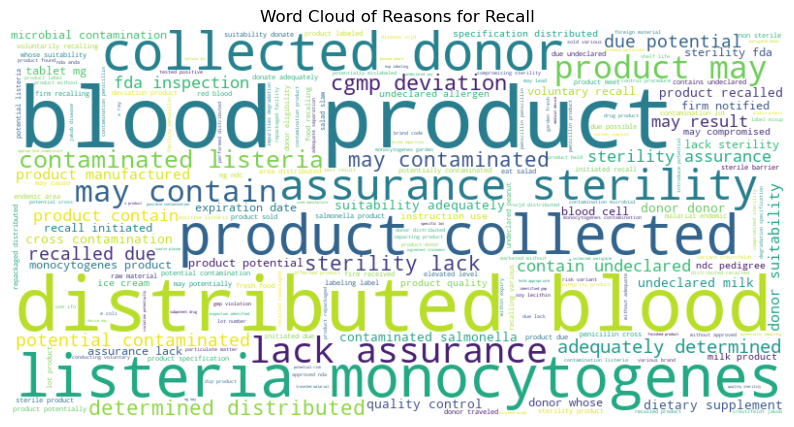

In [54]:
# Create a word cloud
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(reasons.sum()))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Reasons for Recall')
plt.show()

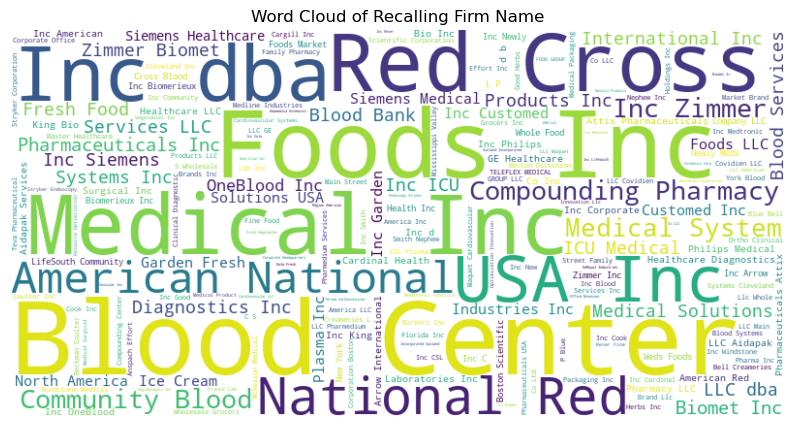

In [55]:
# Compare the wordcloud of recalling firm name and product description
# Word cloud of recalling firm name
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['recalling_firm_name']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Recalling Firm Name')
plt.show()


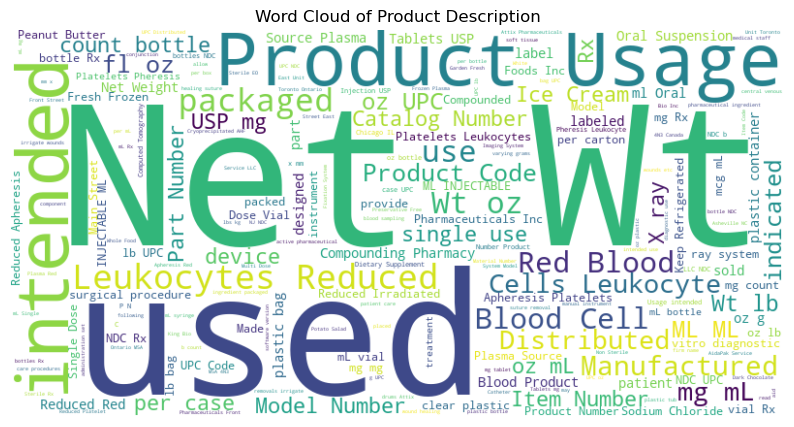

In [56]:
# Word cloud of product description
wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(' '.join(df['product_description']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Product Description')
plt.show()


In [57]:
# model for analyzing and classifying the reason for recall
# Importing the necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [58]:
# Convert the list of words into a string
reasons = reasons.apply(lambda x: ' '.join(x))


In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reasons, df['status'], test_size=0.3, random_state=42)

In [60]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()


In [61]:
# Fit and transform the training data
X_train = vectorizer.fit_transform(X_train)


In [62]:
# Transform the testing data
X_test = vectorizer.transform(X_test)


In [63]:
# Initialize the Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()


In [64]:
# Train the classifier
nb_classifier.fit(X_train, y_train)


MultinomialNB()

In [65]:
# Make predictions
y_pred = nb_classifier.predict(X_test)


In [66]:
# Evaluate the model
print('Accuracy:', accuracy_score(y_test, y_pred))
print('\n')
print('Classification Report:') 


Accuracy: 0.8977464110995268


Classification Report:


In [67]:
print(classification_report(y_test, y_pred))
print('\n')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

   Completed       1.00      0.07      0.13       283
     Ongoing       0.88      0.40      0.55      3523
  Terminated       0.90      0.99      0.94     21132

    accuracy                           0.90     24938
   macro avg       0.93      0.49      0.54     24938
weighted avg       0.90      0.90      0.88     24938



Confusion Matrix:
[[   19    12   252]
 [    0  1421  2102]
 [    0   184 20948]]


In [68]:
# Let's see the top 10 words for each class
# Get the feature names
feature_names = np.array(vectorizer.get_feature_names_out())


In [69]:
# Get the top 10 words for each class
for i, status in enumerate(nb_classifier.classes_):
    top_10_words = feature_names[np.argsort(nb_classifier.feature_log_prob_[i])[-10:]]
    print(f'Top 10 words for {status}: {", ".join(top_10_words)}')
    print('\n')

Top 10 words for Completed: potential, product, firm, temperature, iodine, could, lack, assurance, sterility, food


Top 10 words for Ongoing: device, temperature, may, potential, product, cgmp, deviation, lack, assurance, sterility


Top 10 words for Terminated: assurance, contaminated, listeria, lack, may, sterility, blood, donor, distributed, product


